In [2]:
import pandas as pd

In [25]:
data = pd.read_csv('Ganjar_Pranowo.csv')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           203 non-null    object
 1   id_str               203 non-null    int64 
 2   full_text            203 non-null    object
 3   quote_count          203 non-null    int64 
 4   reply_count          203 non-null    int64 
 5   retweet_count        203 non-null    int64 
 6   favorite_count       203 non-null    int64 
 7   lang                 203 non-null    object
 8   user_id_str          203 non-null    int64 
 9   conversation_id_str  203 non-null    int64 
 10  username             203 non-null    object
 11  tweet_url            203 non-null    object
dtypes: int64(7), object(5)
memory usage: 19.2+ KB


In [27]:
data.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Wed Mar 13 23:57:44 +0000 2024,1768063930335916524,@FaGtng @PDI_Perjuangan @ganjarpranowo @mohmah...,0,0,0,1,in,826210858896281601,1767337030600794436,AgusArdhinto,https://twitter.com/AgusArdhinto/status/176806...
1,Wed Mar 13 23:55:15 +0000 2024,1768063306206700003,@bengkeldodo @aniesbaswedan @cakimiNOW @ganjar...,0,0,0,0,in,2849475270,1767821315174752467,rasya2125,https://twitter.com/rasya2125/status/176806330...
2,Wed Mar 13 23:53:18 +0000 2024,1768062813996789781,@Maudy_Apain @Pencerah___ @ganjarpranowo 😂😂🤣😂😂...,0,0,0,0,in,193623463,1767478692673204493,Sgrdamai,https://twitter.com/Sgrdamai/status/1768062813...
3,Wed Mar 13 23:52:59 +0000 2024,1768062735261290771,@Jim_Lee_77 @ganjarpranowo @AK__aja @Dennysire...,0,1,0,2,in,349027325,1767818217861554679,madetirtasari,https://twitter.com/madetirtasari/status/17680...
4,Wed Mar 13 23:49:57 +0000 2024,1768061971499520482,@Heraloebss @aniesbaswedan @ganjarpranowo Ahha...,0,0,0,0,in,1899440904,1767882386711417326,Pap4Muda_,https://twitter.com/Pap4Muda_/status/176806197...


# Getting Data
Fokus pada data yang ingin dioah dengan memilih variabel full_text, username, dan created_at

In [28]:
df = data[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,@FaGtng @PDI_Perjuangan @ganjarpranowo @mohmah...,AgusArdhinto,Wed Mar 13 23:57:44 +0000 2024
1,@bengkeldodo @aniesbaswedan @cakimiNOW @ganjar...,rasya2125,Wed Mar 13 23:55:15 +0000 2024
2,@Maudy_Apain @Pencerah___ @ganjarpranowo 😂😂🤣😂😂...,Sgrdamai,Wed Mar 13 23:53:18 +0000 2024
3,@Jim_Lee_77 @ganjarpranowo @AK__aja @Dennysire...,madetirtasari,Wed Mar 13 23:52:59 +0000 2024
4,@Heraloebss @aniesbaswedan @ganjarpranowo Ahha...,Pap4Muda_,Wed Mar 13 23:49:57 +0000 2024
...,...,...,...
198,@__AnakKolong @ganjarpranowo @mohmahfudmd @akb...,kaciput76,Wed Mar 13 19:35:23 +0000 2024
199,@herryuntitledz @Heraloebss @aniesbaswedan @ga...,GudegLegi,Wed Mar 13 19:31:38 +0000 2024
200,@aldianw @Heraloebss @aniesbaswedan @ganjarpra...,GudegLegi,Wed Mar 13 19:29:27 +0000 2024
201,"Untuk Provinsi riau, TIM Yg Ingin Koreksi C 1 ...",ZulkifliLubis69,Wed Mar 13 19:28:19 +0000 2024


# Tools added

In [23]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning data
Pada proses ini, data dibersihkan dari beberapa text yang tidak diinginkan

In [30]:
df.shape

(203, 3)

In [31]:
df = df.drop_duplicates(subset=['full_text'])

In [32]:
df = df.dropna()

In [33]:
df.duplicated().sum()

0

In [34]:
df.shape

(203, 3)

In [35]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+','', text)
  text = re.sub(r'#\S+', "", text)
  text = re.sub(r'RT[\s]+','', text)
  text = re.sub(r'http[s]?\://\S+','',text)

  text = re.sub(r'^A-Za-z0-9','', text)
  text = re.sub(r'\s+',' ',text).strip()

  return text
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [36]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,manusia mabok...,AgusArdhinto,Wed Mar 13 23:57:44 +0000 2024
1,yg jdi backing kawal pemilu sapa yaa... pangka...,rasya2125,Wed Mar 13 23:55:15 +0000 2024
2,😂😂🤣😂😂sejarah dan ilmu pengetahuan umum masih a...,Sgrdamai,Wed Mar 13 23:53:18 +0000 2024
3,wow..... dimana rasa kemanusiaannya.,madetirtasari,Wed Mar 13 23:52:59 +0000 2024
4,ahha.. ngapain nangis dan ngamuk2.. yg ada 02 ...,Pap4Muda_,Wed Mar 13 23:49:57 +0000 2024
...,...,...,...
198,aturannya yg buat kementerian yg menterinya ka...,kaciput76,Wed Mar 13 19:35:23 +0000 2024
199,duit rakyat buat kampanye....... malumu mana,GudegLegi,Wed Mar 13 19:31:38 +0000 2024
200,curang bung,GudegLegi,Wed Mar 13 19:29:27 +0000 2024
201,"untuk provinsi riau, tim yg ingin koreksi c 1 ...",ZulkifliLubis69,Wed Mar 13 19:28:19 +0000 2024


### Prepocessing Data
* Normalisasi
* Stopword
* Tokenize
* Stemming

#### normalisasi

In [37]:

norm = {'yg':'yang', 
        'anis':'', 
        'prabowo':'', 
        'jdi':'jadi', 
        '😂':'',
        '🤣':'',
        'ngamuk2':'ngamuk-ngamuk',
        'nghadepin':'menghadapi',
        'klw':'kalau',
        'gtu':'gitu',
        'klu':'kalau',
        'koq':'kok',
        'utk':'untuk',
        'tp':'tapi',
        'jdi':'jadi',
        'bagi2':'bagi-bagi',
        'krn':'karena',
        'bkn':'bukan',
        'udh':'udah',
        'koq':'',
        'thok':'saja',
        'walopun':'walaupun',
        'cemua':'semua',
        'elu':'kamu',
        'Malu2in':'malu-maluin',
        'Lho':'loh',
        'aq':'saya',
        'kamsudnye':'maksudnya',
        'anjing':'',
        'klean':'kalian',
        'taon':'tahun',
        '💪':'',
        '🤭':'',
        '☔':'',
        '😭':'',
        '😀':'',
        '🔥':'',
        '😁':'',
        '🔥':'',
        '😌':'',
        '😛':'',
        '🙏':'',
        '🥺':'',
        '☕':'',
        '☕':'',
        '😬':'',
        '💩':'',
        ':(':'',
        '👏':'',
        '😅':'',
        '😁':'',
        '🤭':'',
        '🤔':'',
        '😃':'',
        '😄':'',
        '🤔':'',
        '🤪':'',
        '😆':'',
        '🤦‍♂️':'',
        }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,manusia mabok...,AgusArdhinto,Wed Mar 13 23:57:44 +0000 2024
1,yang jadi backing kawal pemilu sapa yaa... pan...,rasya2125,Wed Mar 13 23:55:15 +0000 2024
2,sejarah dan ilmu pengetahuan umum masih ada pe...,Sgrdamai,Wed Mar 13 23:53:18 +0000 2024
3,wow..... dimana rasa kemanusiaannya.,madetirtasari,Wed Mar 13 23:52:59 +0000 2024
4,ahha.. ngapain nangis dan ngamuk-ngamuk.. yang...,Pap4Muda_,Wed Mar 13 23:49:57 +0000 2024
...,...,...,...
198,aturannya yang buat kementerian yang menteriny...,kaciput76,Wed Mar 13 19:35:23 +0000 2024
199,duit rakyat buat kampanye....... malumu mana,GudegLegi,Wed Mar 13 19:31:38 +0000 2024
200,curang bung,GudegLegi,Wed Mar 13 19:29:27 +0000 2024
201,"untuk provinsi riau, tim yang ingin koreksi c ...",ZulkifliLubis69,Wed Mar 13 19:28:19 +0000 2024


#### Stopwords

In [38]:

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory,StopWordRemover,ArrayDictionary
more_stop_words = ['tidak']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head(5)

,full_text,username,created_at
0,manusia mabok...,AgusArdhinto,Wed Mar 13 23:57:44 +0000 2024
1,jadi backing kawal pemilu sapa yaa... pangkat ...,rasya2125,Wed Mar 13 23:55:15 +0000 2024
2,sejarah ilmu pengetahuan umum ada pelajarannya...,Sgrdamai,Wed Mar 13 23:53:18 +0000 2024
3,wow..... rasa kemanusiaannya.,madetirtasari,Wed Mar 13 23:52:59 +0000 2024
4,ahha.. ngapain nangis ngamuk-ngamuk.. ada 02 m...,Pap4Muda_,Wed Mar 13 23:49:57 +0000 2024


#### Proses Tokenized 
Merubah kata dasar menjadi imbuhan

In [39]:
#Tokenize
tokenized = df['full_text'].apply(lambda x:stopword(x))
df.head()

,full_text,username,created_at
0,manusia mabok...,AgusArdhinto,Wed Mar 13 23:57:44 +0000 2024
1,jadi backing kawal pemilu sapa yaa... pangkat ...,rasya2125,Wed Mar 13 23:55:15 +0000 2024
2,sejarah ilmu pengetahuan umum ada pelajarannya...,Sgrdamai,Wed Mar 13 23:53:18 +0000 2024
3,wow..... rasa kemanusiaannya.,madetirtasari,Wed Mar 13 23:52:59 +0000 2024
4,ahha.. ngapain nangis ngamuk-ngamuk.. ada 02 m...,Pap4Muda_,Wed Mar 13 23:49:57 +0000 2024


In [40]:
tokenized = df['full_text']
tokenized

0                                       manusia mabok...
1      jadi backing kawal pemilu sapa yaa... pangkat ...
2      sejarah ilmu pengetahuan umum ada pelajarannya...
3                          wow..... rasa kemanusiaannya.
4      ahha.. ngapain nangis ngamuk-ngamuk.. ada 02 m...
                             ...                        
198    aturannya buat kementerian menterinya kader pd...
199         duit rakyat buat kampanye....... malumu mana
200                                          curang bung
201    provinsi riau, tim ingin koreksi c 1 plano sil...
202                                               kontol
Name: full_text, Length: 203, dtype: object

In [87]:
tokenized.to_csv("E:/Project/Scrapping Data Twitter/analisis sentimen/tokenizedganjarpranowo.csv")

#### Proses Tokenized
* proses ini boleh dilakukan atau tidak

In [71]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0                                    [manusia, mabok...]
1      [jadi, backing, kawal, pemilu, sapa, yaa..., p...
2      [sejarah, ilmu, pengetahuan, umum, ada, pelaja...
3                      [wow....., rasa, kemanusiaannya.]
4      [ahha.., ngapain, nangis, ngamuk-ngamuk.., ada...
                             ...                        
198    [aturannya, buat, kementerian, menterinya, kad...
199    [duit, rakyat, buat, kampanye......., malumu, ...
200                                       [curang, bung]
201    [provinsi, riau,, tim, ingin, koreksi, c, 1, p...
202                                             [kontol]
Name: full_text, Length: 203, dtype: object

In [47]:
#Steming
#merubah kata dasar menjadi kata imbuhan

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [48]:
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

manusia mabok
jadi backing kawal milu sapa yaa pangkat nya apa kalau kelas orang biasa lewat maaf tingkat gubernur dn menteri luar biasa tunduk kok hahaha
sejarah ilmu tahu umum ada ajar ya
wow rasa manusia
ahha ngapain nang ngamuk-ngamuk ada 02 makin panik hadap hak angket
bukan abang 
yuhuuu surup massal kalah kalah dr 01 wah sungguh nengagumkan kan hayuk dukung hak angket or hak angkot dpt pastiin dulu klo semua anggota dpr dr pdip sendiri sdh pd tanda tangan eaaaaa
buzzer bang abis milu tetep dapet borong buat muji2 bayar nama perempuan rendah bang
ganjar jangan kamu jual obat rakyat udah ada percaya sama kamu logowo
they will not care sedang bagi kue kuasa sekarang simpan tenaga sobat
mohon maaf milu udah lewat
taik lu
curang tsm bisa laku rezim sedang kuasa rezim sedang kuasa justru jadi dukung paslon 02
kok kalau gak tau nama gubernur wajar gonta ganti kalau gak nama ibukota nya nama goblog ngaku junjung dah menang dukung kok oleng
usut curang tuntas ngapain reformasi 98 klo cur

# Translete

In [35]:
data = pd.read_csv('tokenizedganjarpranowo.csv')
data.head()

,Unnamed: 0,full_text
0,0,manusia mabok...
1,1,jadi backing kawal pemilu sapa yaa... pangkat ...
2,2,sejarah ilmu pengetahuan umum pelajarannya ya?
3,3,wow..... rasa kemanusiaannya.
4,4,ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin...


In [36]:
data = data.drop('Unnamed: 0', axis=1)

In [37]:
data

,full_text
0,manusia mabok...
1,jadi backing kawal pemilu sapa yaa... pangkat ...
2,sejarah ilmu pengetahuan umum pelajarannya ya?
3,wow..... rasa kemanusiaannya.
4,ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin...
...,...
198,aturannya buat kementerian menterinya kader pd...
199,duit rakyat buat kampanye....... malumu mana
200,curang bung
201,"provinsi riau, tim koreksi c 1 plano silahkan ..."


#### menghilangkan nilai yang kosong

In [38]:
data.isna().sum()

full_text    14
dtype: int64

In [39]:
data = data.dropna()

In [40]:
data.isna().sum()

full_text    0
dtype: int64

#### convert data ke string

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 202
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  189 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [45]:
data['full_text'] = data['full_text'].astype("string")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 202
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  189 non-null    string
dtypes: string(1)
memory usage: 3.0 KB


C:\Users\Jats\AppData\Local\Temp\ipykernel_6024\1570595727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['full_text'] = data['full_text'].astype("string")


#### translate data

In [46]:
from translate import Translator

In [47]:
#merubah bahasa indonesia menjadi inggris

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)

C:\Users\Jats\AppData\Local\Temp\ipykernel_6024\3439644229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_english'] = data['full_text'].apply(convert_eng)


In [48]:
data

,full_text,tweet_english
0,manusia mabok...,drunken man...
1,jadi backing kawal pemilu sapa yaa... pangkat ...,so backing the election guard say hello... wha...
2,sejarah ilmu pengetahuan umum pelajarannya ya?,"the history of general science is the lesson, ..."
3,wow..... rasa kemanusiaannya.,wow..... the sense of humanity.
4,ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin...,ahha.. why are you crying andraging.. 02 getti...
...,...,...
198,aturannya buat kementerian menterinya kader pd...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
199,duit rakyat buat kampanye....... malumu mana,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
200,curang bung,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
201,"provinsi riau, tim koreksi c 1 plano silahkan ...",MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [51]:
data.to_csv("E:/Project/Scrapping Data Twitter/analisis sentimen/terjemahanganjarpranowo.csv")

# Labeling

In [3]:
data = pd.read_csv("terjemahanganjarpranowo.csv", index_col=0)
data.head(5)

,full_text,tweet_english
0,manusia mabok...,drunken man...
1,jadi backing kawal pemilu sapa yaa... pangkat ...,so backing the election guard say hello... wha...
2,sejarah ilmu pengetahuan umum pelajarannya ya?,"the history of general science is the lesson, ..."
3,wow..... rasa kemanusiaannya.,wow..... the sense of humanity.
4,ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin...,ahha.. why are you crying andraging.. 02 getti...


In [4]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jats\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Analisis TextBlob

In [6]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas = analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')
    
    total += 1

print(f'Hasil_Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil_Analisis Data:
Positif = 82
Netral = 73
Negatif = 34

Total Data: 189


In [9]:
#cek data sentimen
data['Klasifikasi'] = status
data.head(5)

,full_text,tweet_english,Klasifikasi
0,manusia mabok...,drunken man...,Netral
1,jadi backing kawal pemilu sapa yaa... pangkat ...,so backing the election guard say hello... wha...,Negatif
2,sejarah ilmu pengetahuan umum pelajarannya ya?,"the history of general science is the lesson, ...",Positif
3,wow..... rasa kemanusiaannya.,wow..... the sense of humanity.,Positif
4,ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin...,ahha.. why are you crying andraging.. 02 getti...,Positif


# Visualisasi
Memvisualisasikan sentimen masyarakat

In [10]:
from wordcloud import WordCloud, STOPWORDS

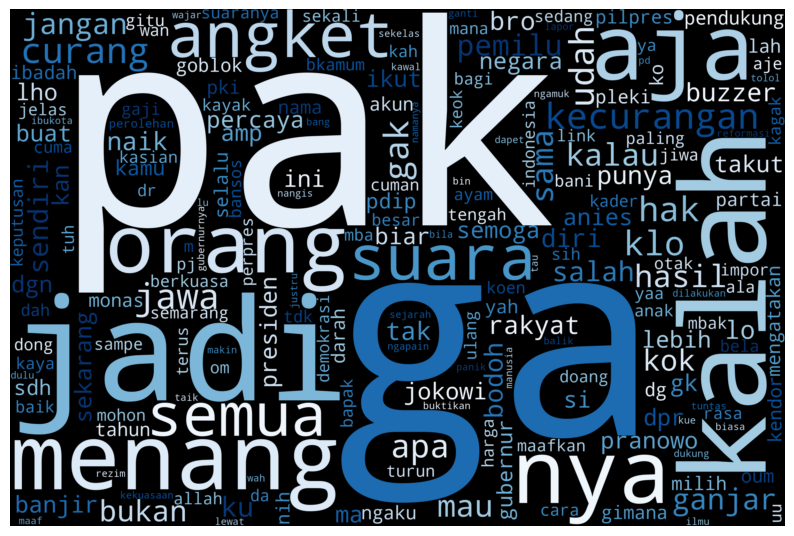

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' ' .join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width= 3000,
    height= 2000,
    random_state= 3,
    background_color= 'black',
    colormap= 'Blues_r',
    collocations= False,
    stopwords= STOPWORDS,
).generate(all_words)

plot_cloud(wordcloud)

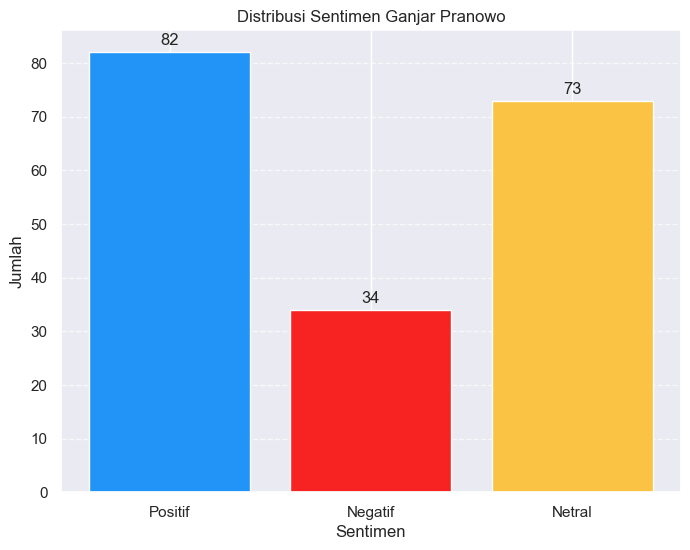

In [41]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0,3), 
                    textcoords="offset points", 
                    ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")

# Klasifikasi Sentimen
Menggunakan metode Naive Bayes

In [43]:
dataset = data.drop(['full_text'], axis=1 , inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [44]:
import random

In [46]:
set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
        set_positif.append(n)
    elif(n[1] == 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_positif)/2))
set_netral = random.sample(set_netral, k=int(len(set_positif)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [47]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test:", cl.accuracy(dataset))

Akurasi Test: 0.746031746031746


In [53]:
#labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify()  == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 51
Netral = 109
Negatif = 29

Total Data : 189


In [55]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['Klasifikasi Bayes'] = status

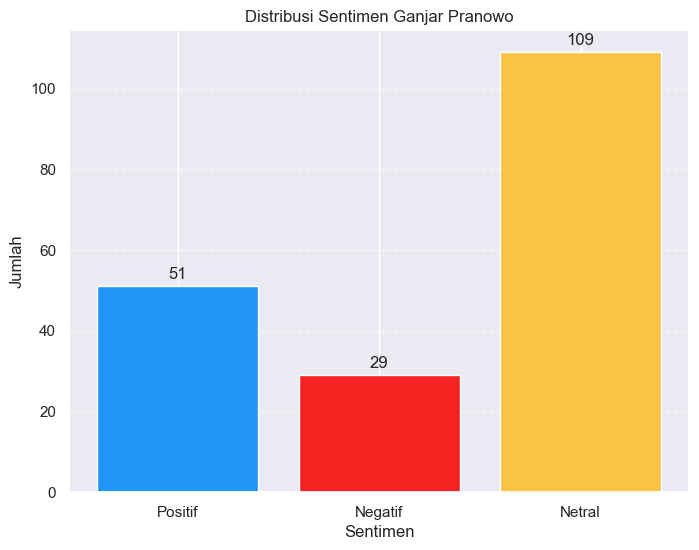

In [56]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts): #menambahkan keterangan presentase
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0,3), 
                    textcoords="offset points", 
                    ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")

In [57]:
data

,full_text,tweet_english,Klasifikasi,Klasifikasi Bayes
0,manusia mabok...,drunken man...,Netral,Netral
1,jadi backing kawal pemilu sapa yaa... pangkat ...,so backing the election guard say hello... wha...,Negatif,Negatif
2,sejarah ilmu pengetahuan umum pelajarannya ya?,"the history of general science is the lesson, ...",Positif,Positif
3,wow..... rasa kemanusiaannya.,wow..... the sense of humanity.,Positif,Netral
4,ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin...,ahha.. why are you crying andraging.. 02 getti...,Positif,Netral
...,...,...,...,...
198,aturannya buat kementerian menterinya kader pd...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,NaN
199,duit rakyat buat kampanye....... malumu mana,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,NaN
200,curang bung,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,NaN
201,"provinsi riau, tim koreksi c 1 plano silahkan ...",MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,NaN


In [59]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
        else:
            print("Tuple tidak memiliki cukup elemen.")

Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
text: wow..... rasa kemanusiaannya.
Classifier: Positif
Classifier Bayes: Netral

text: ahha.. ngapain nangis ngamuk-ngamuk.. 02 makin panik menghadapi hak angket...
Classifier: Positif
Classifier Bayes: Netral

Tuple tidak memiliki cukup elemen.
text: yuhuuu kesurupan massal kalah.. kalah dr 01.. wah sungguh nengagumkan kan? hayuk dukung hak angket or hak angkot dpt pastiin dulu klo semua anggota dpr dr pdip sendiri sdh pd tanda tangan eaaaaa???
Classifier: Positif
Classifier Bayes: Netral

Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
text: mohon maaf pemilu udah lewat
Classifier: Negatif
Classifier Bayes: Netral

Tuple tidak memiliki cukup elemen.
text: kecurangan tsm dilakukan rezim sedang berkuasa. rezim sedang berkuasa justru jadi pendukung paslon 02.
Classifier: Netral
Classifier Bayes: Positif

text: pekok,kalau gak 